In [125]:
%matplotlib inline

In [126]:
import pandas as pd

In [127]:
cat_data = pd.read_csv('./data/categorical_features.csv', low_memory=False, dtype=int)
cat_data = cat_data.drop('Unnamed: 0', axis=1)
cat_data['id'] = cat_data['id'].astype(int)

In [128]:
cat_data = cat_data.astype(bool)

In [129]:
cat_data.shape

(243721, 99)

In [130]:
reviews_data = pd.read_csv('./data/reviews_features.csv', low_memory=False, dtype=float)
reviews_data = reviews_data.drop('Unnamed: 0', axis=1)
reviews_data['id'] = reviews_data['id'].astype(int).astype("category")

In [131]:
reviews_data.shape

(243721, 5)

In [132]:
# select random rows
import numpy as np

np.random.seed(1234)
sample_size=10000
idxs = np.random.randint(0, cat_data.shape[0], sample_size)
idxs

array([224047, 189139, 165158, ..., 149821, 130353, 163357])

In [133]:
dependent_variable = 'review_scores_rating'

In [134]:
data = pd.concat([cat_data.loc[idxs], reviews_data.loc[idxs][[dependent_variable]]], axis=1)

In [135]:
data.sample(10)

,id,bed_type_airbed,bed_type_couch,bed_type_futon,bed_type_pull_out_sofa,bed_type_real_bed,room_type_entire_home_apt,room_type_private_room,room_type_shared_room,neighbourhood_cleansed_bayview,...,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_response_time_a_few_days_or_more,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,review_scores_rating
50468,True,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,True,False,False,100.0
127691,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,True,False,100.0
4625,True,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,NaN
101593,True,False,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,True,NaN
177002,True,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,True,95.0
8917,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,False,False,True,False,False,100.0
208479,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,92.0
202350,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,94.0
169631,True,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,NaN
98991,True,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,True,96.0


In [136]:
# Drop missing values from depedent variable
data = data.dropna(subset=[dependent_variable])

In [137]:
# Drop outliers from dependent variable
data = data.loc[data[dependent_variable] >= 80]

In [138]:
data.shape

(7613, 100)

bed_type_airbed


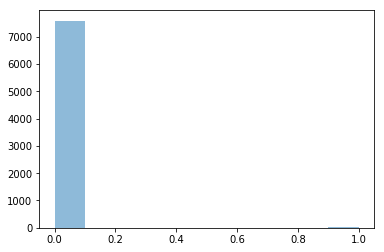

bed_type_couch


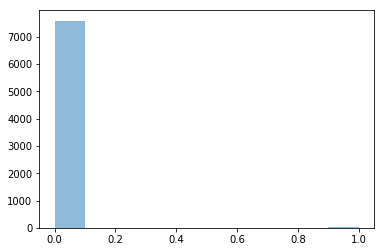

bed_type_futon


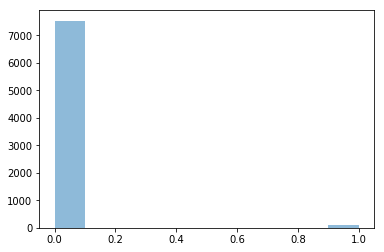

bed_type_pull_out_sofa


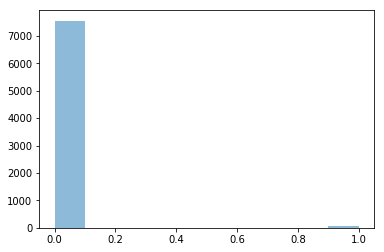

bed_type_real_bed


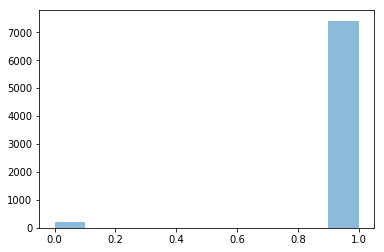

room_type_entire_home_apt


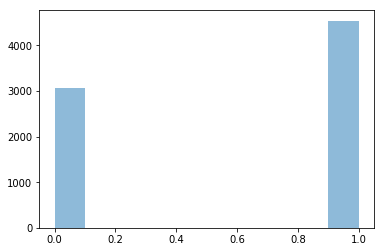

room_type_private_room


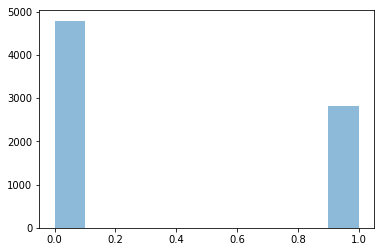

room_type_shared_room


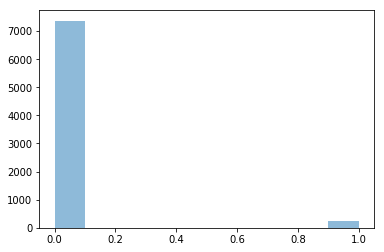

neighbourhood_cleansed_bayview


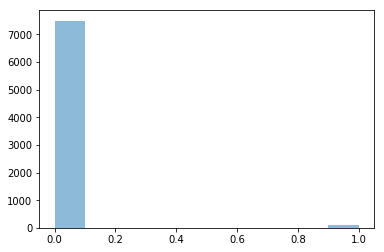

In [139]:
import matplotlib.pyplot as plt
for c in data.columns[:10]:
    if 'id' != c:
        print c
        lst = list(data[c].fillna('0'))
        plt.hist(lst, bins=10, alpha=0.5)
        plt.show()

bed_type_airbed


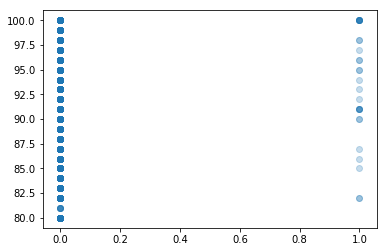

bed_type_couch


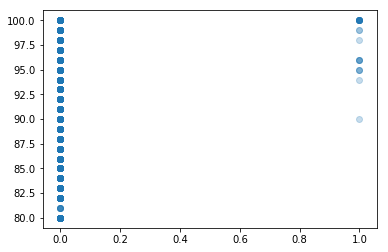

bed_type_futon


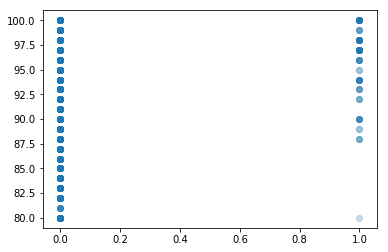

bed_type_pull_out_sofa


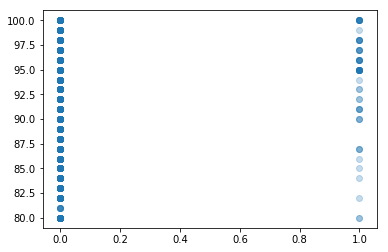

bed_type_real_bed


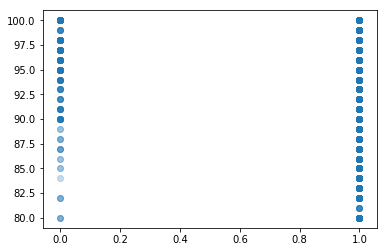

room_type_entire_home_apt


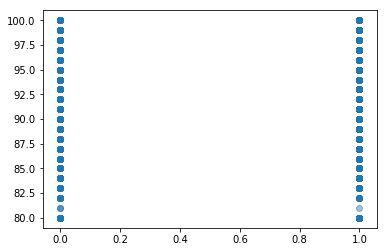

room_type_private_room


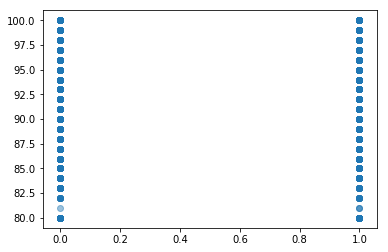

room_type_shared_room


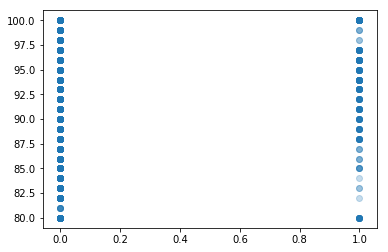

neighbourhood_cleansed_bayview


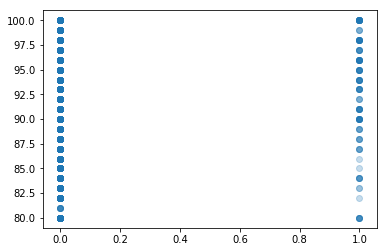

neighbourhood_cleansed_bernal_heights


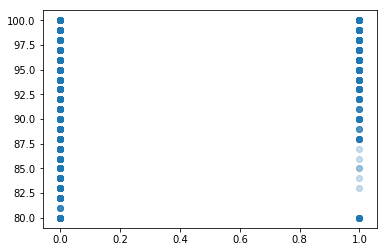

neighbourhood_cleansed_castro_upper_market


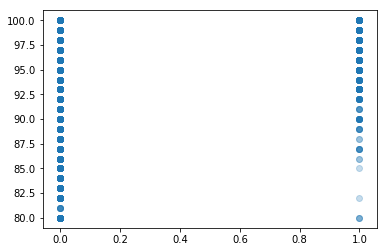

neighbourhood_cleansed_chinatown


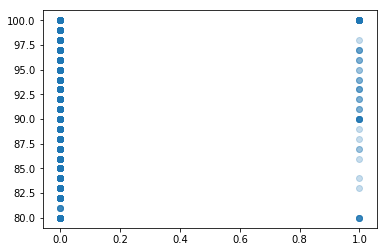

neighbourhood_cleansed_crocker_amazon


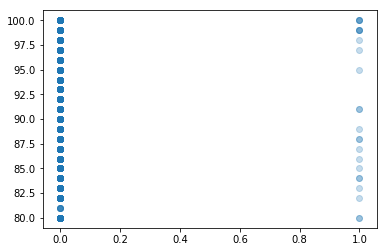

neighbourhood_cleansed_diamond_heights


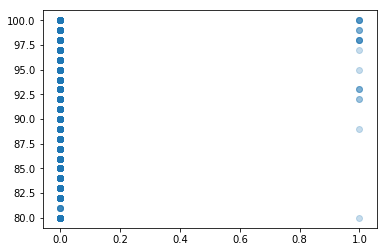

neighbourhood_cleansed_downtown_civic_center


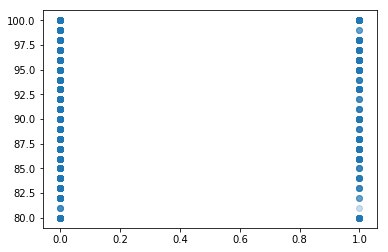

neighbourhood_cleansed_excelsior


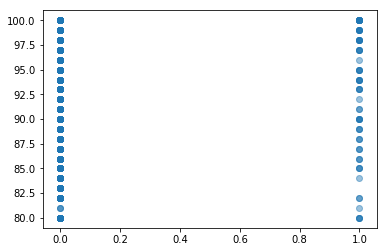

neighbourhood_cleansed_financial_district


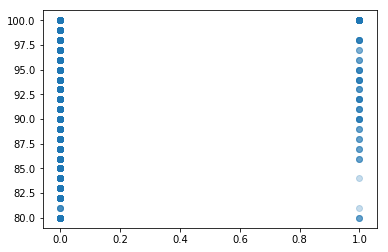

neighbourhood_cleansed_glen_park


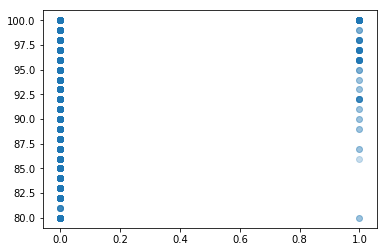

neighbourhood_cleansed_golden_gate_park


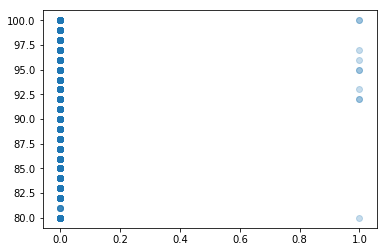

neighbourhood_cleansed_haight_ashbury


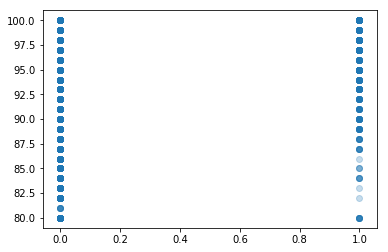

neighbourhood_cleansed_inner_richmond


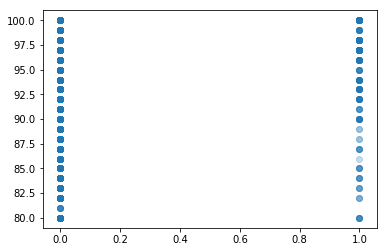

neighbourhood_cleansed_inner_sunset


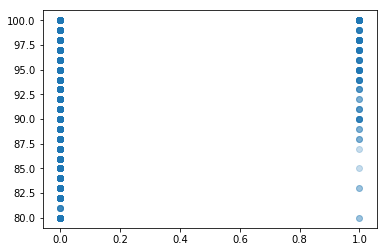

neighbourhood_cleansed_lakeshore


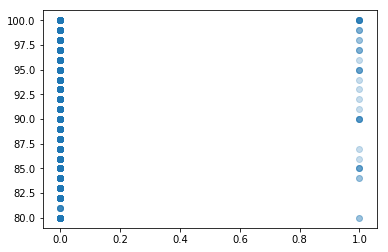

neighbourhood_cleansed_marina


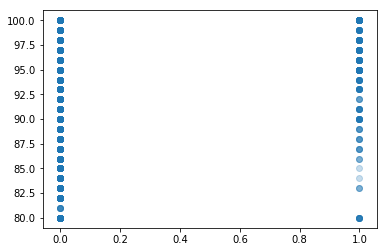

neighbourhood_cleansed_mission


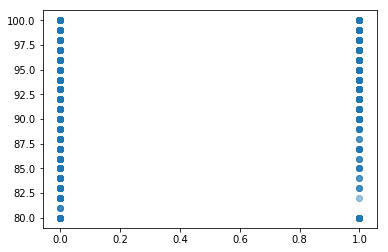

neighbourhood_cleansed_nob_hill


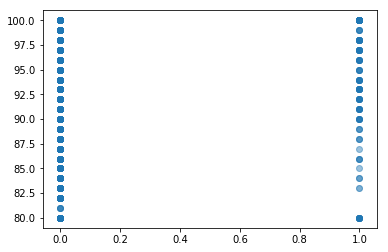

neighbourhood_cleansed_noe_valley


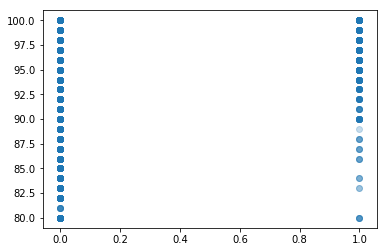

neighbourhood_cleansed_north_beach


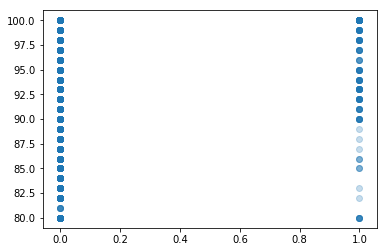

neighbourhood_cleansed_ocean_view


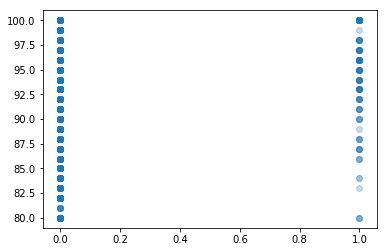

neighbourhood_cleansed_outer_mission


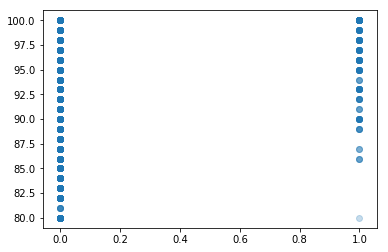

neighbourhood_cleansed_outer_richmond


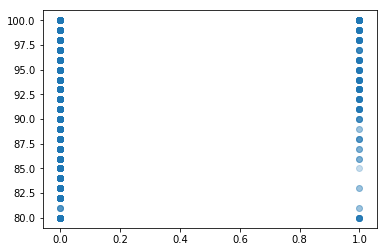

neighbourhood_cleansed_outer_sunset


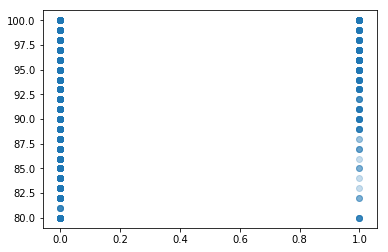

neighbourhood_cleansed_pacific_heights


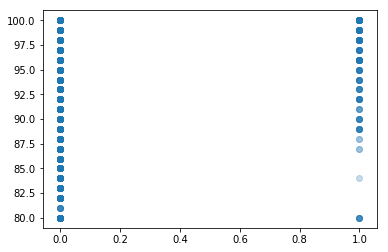

neighbourhood_cleansed_parkside


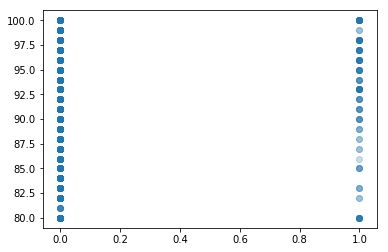

neighbourhood_cleansed_potrero_hill


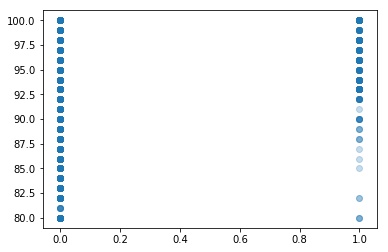

neighbourhood_cleansed_presidio


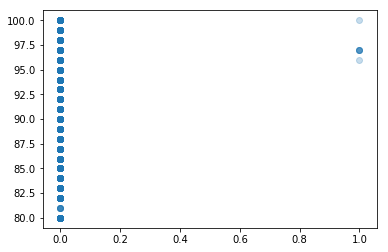

neighbourhood_cleansed_presidio_heights


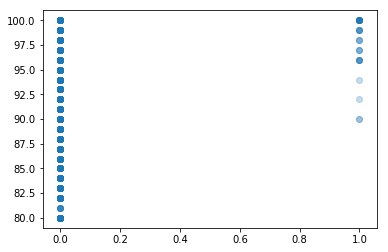

neighbourhood_cleansed_russian_hill


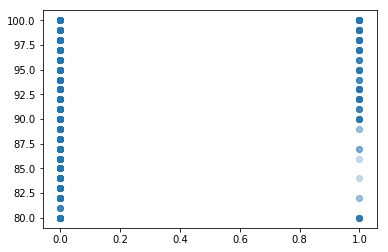

neighbourhood_cleansed_seacliff


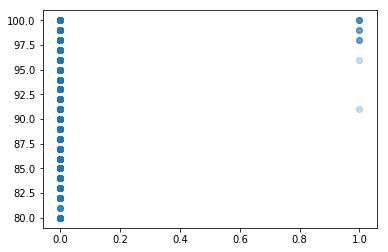

neighbourhood_cleansed_south_of_market


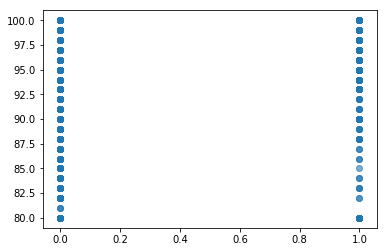

neighbourhood_cleansed_treasure_island_ybi


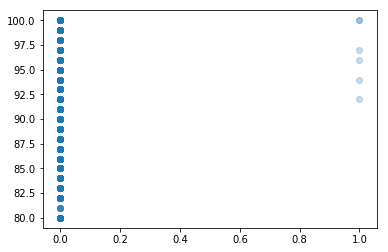

neighbourhood_cleansed_twin_peaks


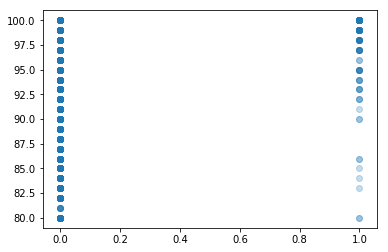

neighbourhood_cleansed_visitacion_valley


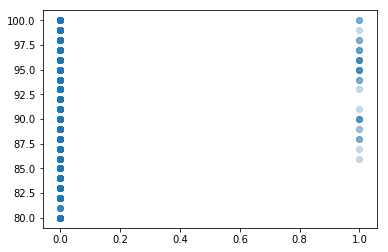

neighbourhood_cleansed_west_of_twin_peaks


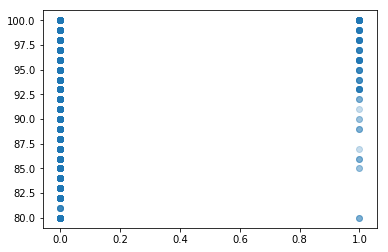

neighbourhood_cleansed_western_addition


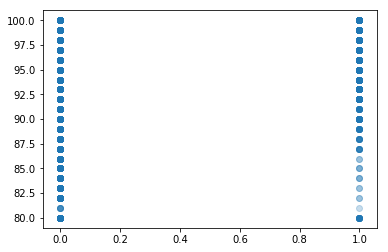

property_type_aparthotel


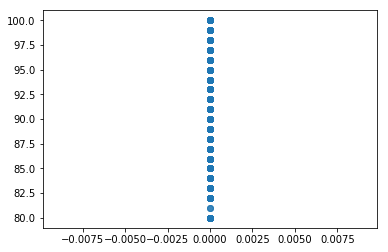

property_type_apartment


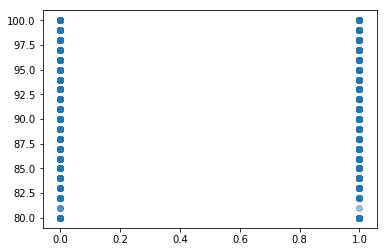

property_type_barn


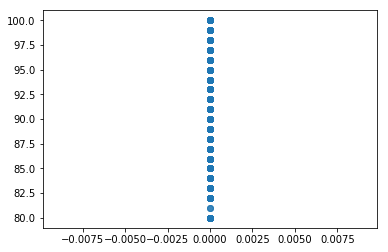

property_type_bed_breakfast


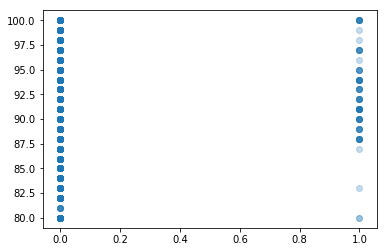

property_type_bed_and_breakfast


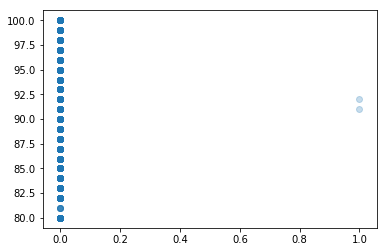

property_type_boat


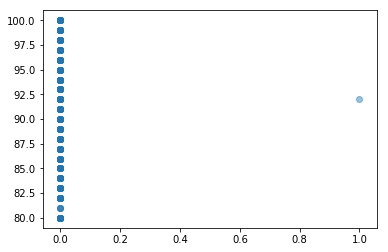

property_type_boutique_hotel


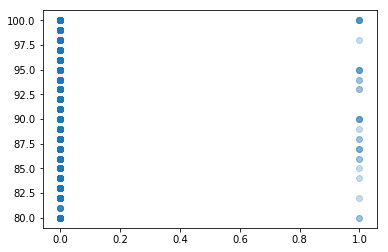

property_type_bungalow


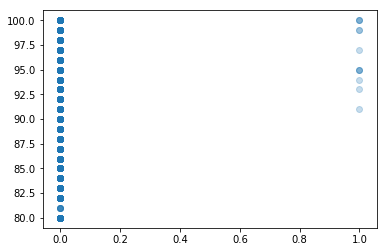

property_type_cabin


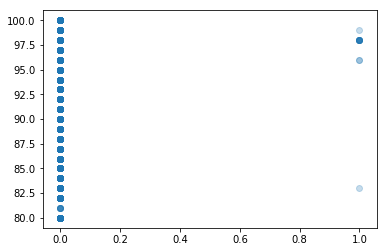

property_type_camper_rv


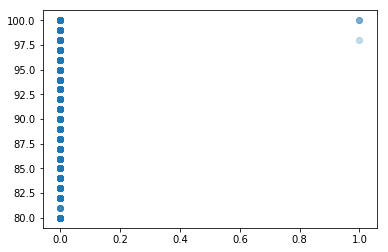

property_type_casa_particular


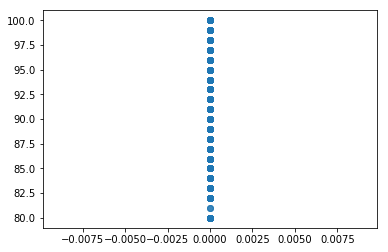

property_type_castle


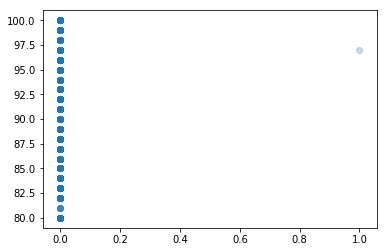

property_type_cave


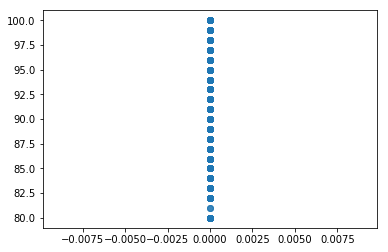

property_type_chalet


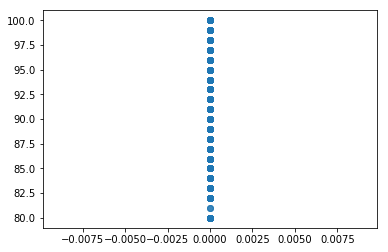

property_type_condominium


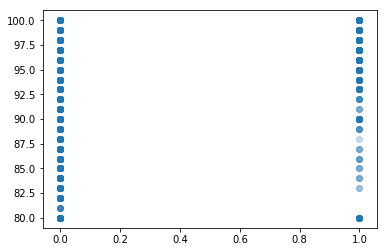

property_type_dorm


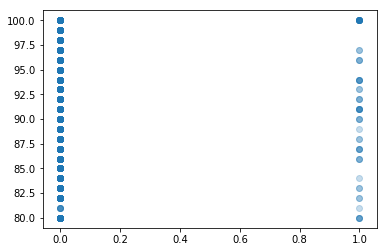

property_type_earth_house


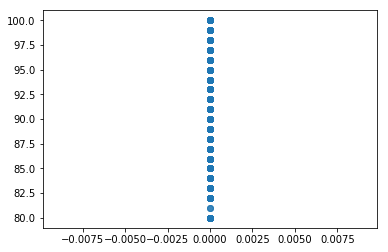

property_type_entire_floor


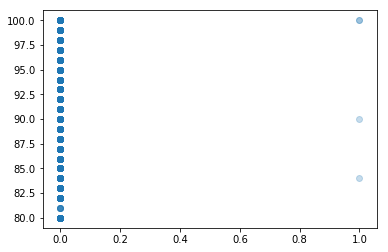

property_type_floor


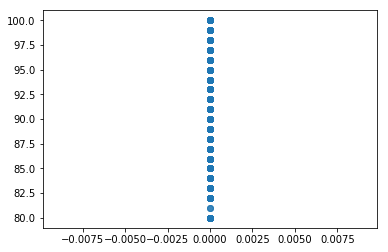

property_type_guest_suite


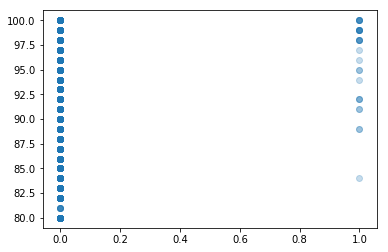

property_type_guesthouse


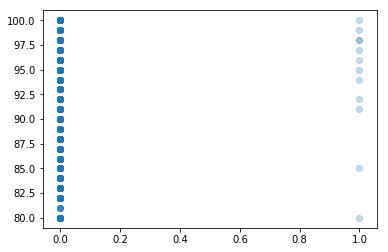

property_type_hostel


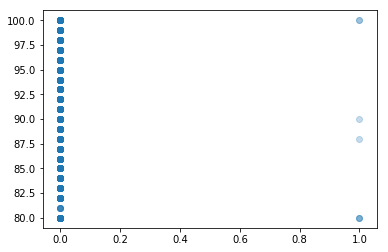

property_type_hotel


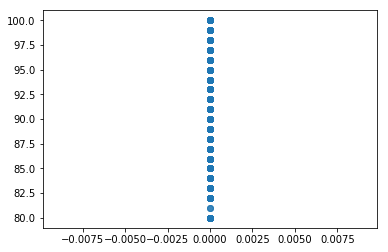

property_type_house


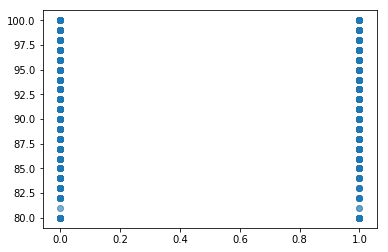

property_type_in_law


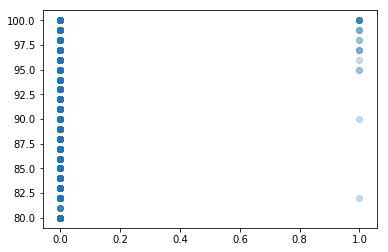

property_type_island


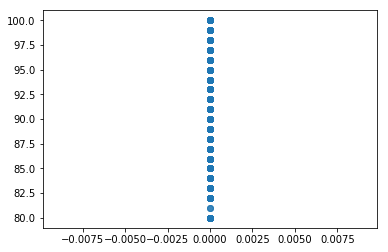

property_type_lighthouse


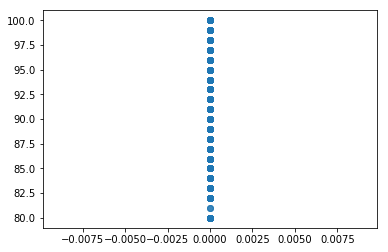

property_type_loft


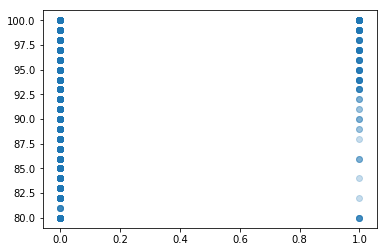

property_type_other


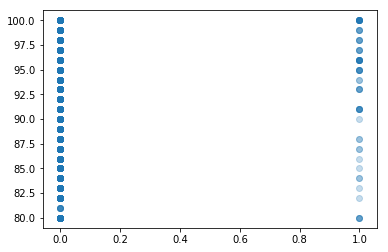

property_type_pension_korea


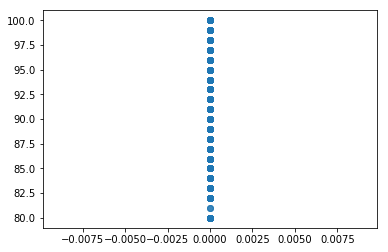

property_type_plane


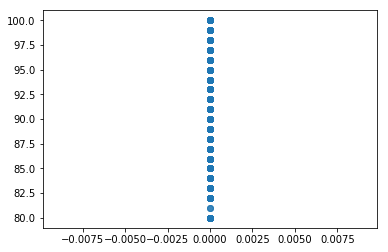

property_type_resort


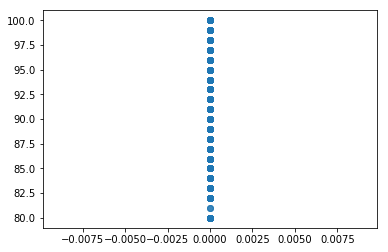

property_type_serviced_apartment


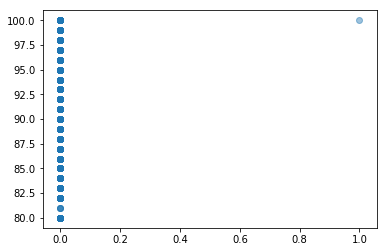

property_type_tent


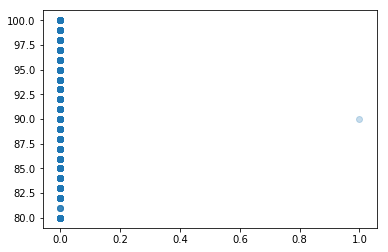

property_type_timeshare


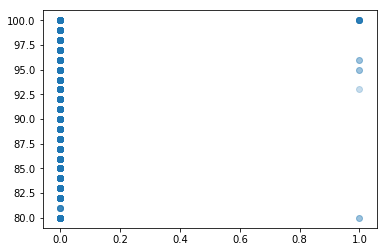

property_type_tiny_house


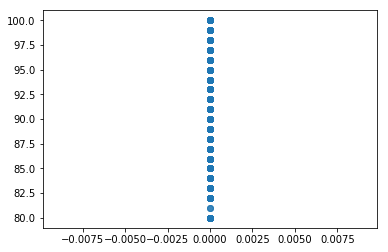

property_type_tipi


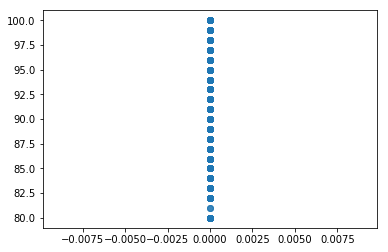

property_type_townhouse


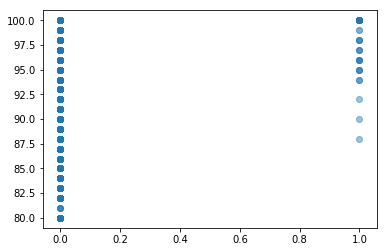

property_type_treehouse


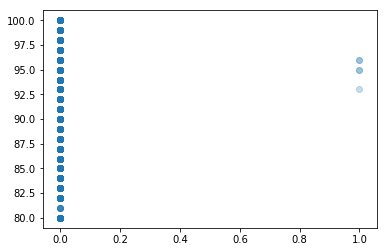

property_type_vacation_home


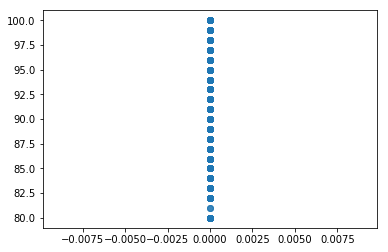

property_type_villa


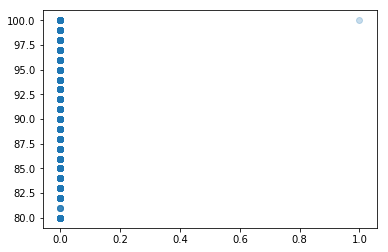

property_type_yurt


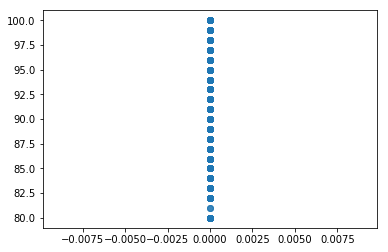

cancellation_policy_flexible


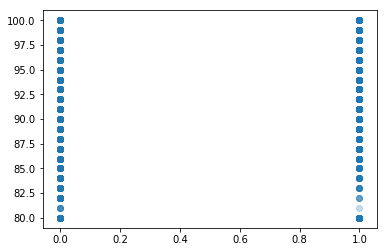

cancellation_policy_flexible_new


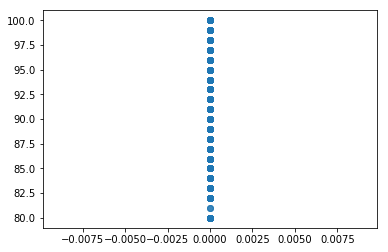

cancellation_policy_moderate


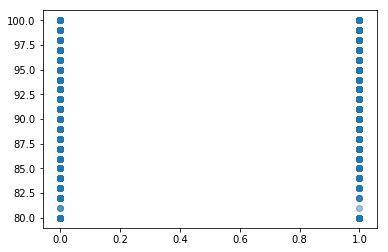

cancellation_policy_no_refunds


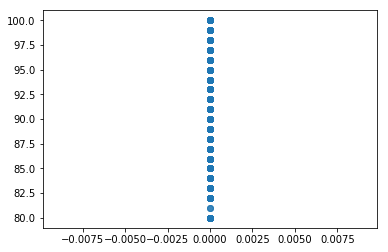

cancellation_policy_strict


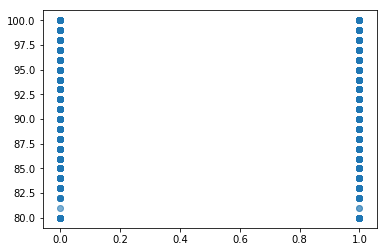

cancellation_policy_super_strict_30


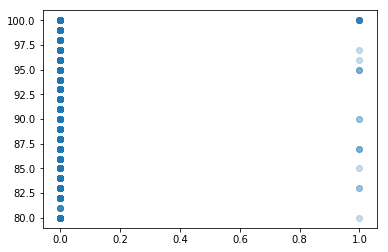

cancellation_policy_super_strict_60


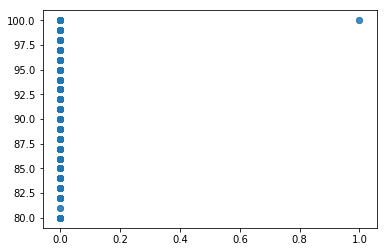

host_response_time_a_few_days_or_more


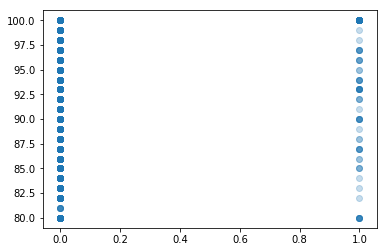

host_response_time_within_a_day


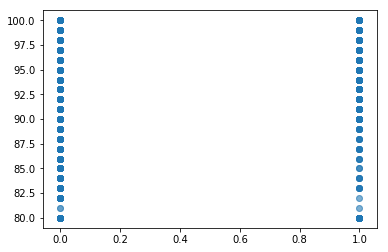

host_response_time_within_a_few_hours


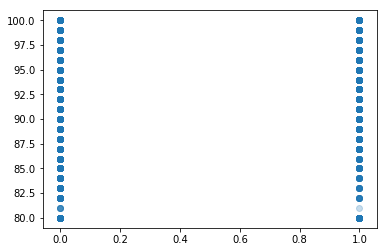

host_response_time_within_an_hour


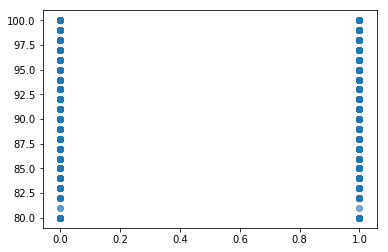

In [140]:
y_vals = data[dependent_variable].fillna(data[dependent_variable].mean())
for c in data.columns[:100]:
    if c not in ['id', dependent_variable]:
        print c
        lst = list(data[c].fillna('0'))
        plt.scatter(lst, y_vals, alpha=0.25)
        plt.show()

In [141]:
# Create the X and y
# Drop the columns that we do not need
y = data[dependent_variable]
X = data.drop(['id', dependent_variable], axis=1)

In [142]:
# Let's get rid of useless categorical features

from feature_selector import FeatureSelector

fs = FeatureSelector(data=X, 
                     labels=y)
fs.identify_single_unique()
fs.identify_zero_importance(task='regression', eval_metric='rmse')
fs.identify_low_importance(cumulative_importance=0.7)

X = fs.remove(methods=['single_unique', 'low_importance', 'zero_importance'])

19 features with a single unique value.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[66]	valid_0's rmse: 4.9454
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[100]	valid_0's rmse: 4.71188
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[292]	valid_0's rmse: 5.11946
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[200]	valid_0's rmse: 4.88962
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[62]	valid_0's rmse: 4.79741
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[70]	valid_0's rmse: 4.81766
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[48]	valid_0's rmse: 5.00367
Training until validation scores d

In [143]:
X.shape

(7613, 22)

# Create feature interactions

In [167]:
# Create a dictionary of interactions

inter_dct = {}

neighborhood = []
property_type = []
for c in X.columns: 
    if 'neighbourhood_cleansed_' in c:
        neighborhood.append(c)
    elif 'property_type_' in c:
        property_type.append(c)

for n in neighborhood:
    for p in property_type:
        try:
            inter_dct[n].append((p, 'M'))
        except Exception as e:
            inter_dct[n] = [(p, 'M')]

print inter_dct

{'neighbourhood_cleansed_castro_upper_market': [('property_type_apartment', 'M'), ('property_type_condominium', 'M'), ('property_type_dorm', 'M'), ('property_type_house', 'M')], 'neighbourhood_cleansed_excelsior': [('property_type_apartment', 'M'), ('property_type_condominium', 'M'), ('property_type_dorm', 'M'), ('property_type_house', 'M')], 'neighbourhood_cleansed_chinatown': [('property_type_apartment', 'M'), ('property_type_condominium', 'M'), ('property_type_dorm', 'M'), ('property_type_house', 'M')], 'neighbourhood_cleansed_downtown_civic_center': [('property_type_apartment', 'M'), ('property_type_condominium', 'M'), ('property_type_dorm', 'M'), ('property_type_house', 'M')], 'neighbourhood_cleansed_south_of_market': [('property_type_apartment', 'M'), ('property_type_condominium', 'M'), ('property_type_dorm', 'M'), ('property_type_house', 'M')], 'neighbourhood_cleansed_noe_valley': [('property_type_apartment', 'M'), ('property_type_condominium', 'M'), ('property_type_dorm', 'M'),

In [171]:
def create_interaction(f1, f2, intyp):
    if 'D' == intype:
        return f1 | f2
    if 'A' == intype:
        return f1 + f2
    
    # Mulitply the features by default
    return f1 & f2

def get_interacted_dataset(ds, interactions_dict, drop=False):
    for k, vals in interactions_dict.items():
        for v in vals:
            ds[k+'_by_'+v[0]] = ds[k] * ds[v[0]]
        
    if drop:
        for k in interactions_dict.keys():
            ds = ds.drop(k, axis=1)
    
    return ds

Train = get_interacted_dataset(X, inter_dct, drop=True)

In [172]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(Train, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1234)

In [173]:
# Impute missing values using most_frequent for both independent and dependent variables

import numpy as np
from sklearn.preprocessing import Imputer

# imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
# imp.fit(X_train)
# X_train = imp.transform(X_train)
# X_test = imp.transform(X_test)

imp = Imputer(missing_values=np.nan, strategy='most_frequent', axis=1)
imp.fit(y_train)
y_train = imp.transform(y_train.values.reshape(-1,1))
y_train = y_train.ravel()
y_test= imp.transform(y_test.values.reshape(-1,1))
y_test = y_test.ravel()

print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(5100, 49)
(5100,)
(2513, 49)
(2513,)


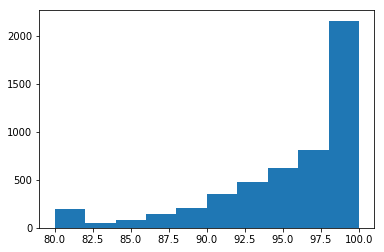

In [174]:
plt.hist(y_train)
plt.show()

In [147]:
# Divide each column by its variance
# y_train = np.log(y_train + 1)
# y_test = np.log(y_test + 1)
# x_train_var = X_train.var(axis=0)
# X_train = X_train / np.sqrt(x_train_var)
# X_test = X_test / np.sqrt(x_train_var)


Mean squared error: 120.62
Variance score: -3.78


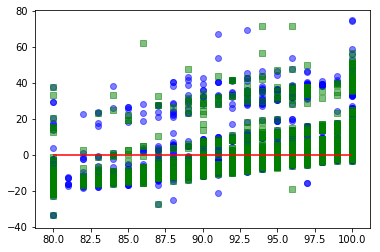

In [175]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score

# Create linear regression object
regr = linear_model.Lasso(alpha=0.01, fit_intercept=False, max_iter=10000)

# Train the model using the training sets
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))

# Plot the residuals
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

In [176]:
from sklearn import model_selection

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR


kfold = model_selection.KFold(n_splits=20, shuffle=True, random_state=1234)


def build_model(model_name):
    return model_name()

for model_name in [LinearRegression, Ridge, ElasticNet, \
                   AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor]:
    
    model = build_model(model_name)
    results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print model_name, results.mean()
    

<class 'sklearn.linear_model.base.LinearRegression'> -25.531338002719615
<class 'sklearn.linear_model.ridge.Ridge'> -25.491141139389654
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> -26.600932520094023
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'> -27.880699830043774
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> -25.53398869797206
<class 'sklearn.ensemble.forest.RandomForestRegressor'> -26.719233052401165


degree is: 2
Mean squared error: 24.00
r2 score: 0.05
explained variance score: 0.05


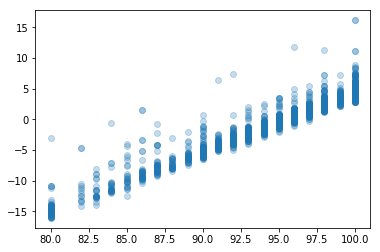

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score


degrees = [2]


for d in degrees:

    polynomial_features = PolynomialFeatures(degree=d,
                                             include_bias=False, 
                                             interaction_only=True)
    model = GradientBoostingRegressor()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # The degree 
    print 'degree is: %s' % d
    
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('r2 score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))
    
    # Explained variance score: 1 is perfect prediction
    print('explained variance score: %.2f' % explained_variance_score(y_test.tolist(), y_pred.tolist()))   
    plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
    plt.show()

Mean squared error: 24.49
r2 score: 0.03
explained variance score: 0.03


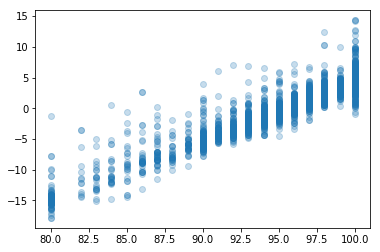

In [178]:
import xgboost


xgb = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.1, gamma=0.05, 
                          subsample=0.5, colsample_bytree=0.2, max_depth=20, 
                          objective='reg:linear')

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.tolist(), y_pred.tolist()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()

In [179]:
from sklearn.cross_decomposition import PLSRegression


model = PLSRegression(n_components=10, scale=False)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.ravel(), y_pred.ravel()))   
# plt.scatter(y_test.ravel(), (y_test-y_pred).ravel(), alpha=0.25)
# plt.show()

Mean squared error: 24.05
r2 score: 0.05
explained variance score: 0.05


# Try stacking on Categorical features

task:         [regression]
metric:       [rmse]
variant:      [A]
n_estimators: [3]

estimator  0: [gbf: GradientBoostingRegressor]
    fold  0:  [23.87722877]
    fold  1:  [26.83665381]
    fold  2:  [26.05622892]
    fold  3:  [25.97812444]
    fold  4:  [25.93512603]
    ----
    MEAN:     [25.73667240] + [0.98663965]

estimator  1: [xgb: XGBRegressor]
    fold  0:  [24.05358305]
    fold  1:  [26.67718723]
    fold  2:  [26.54933401]
    fold  3:  [26.09336304]
    fold  4:  [26.31966329]
    ----
    MEAN:     [25.93862612] + [0.96342689]

estimator  2: [randf: RandomForestRegressor]
    fold  0:  [24.06321870]
    fold  1:  [27.32162947]
    fold  2:  [27.08038130]
    fold  3:  [26.39733760]
    fold  4:  [26.71773789]
    ----
    MEAN:     [26.31606099] + [1.16949580]

Train set was detected.
Transforming...

estimator  0: [gbf: GradientBoostingRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    mo

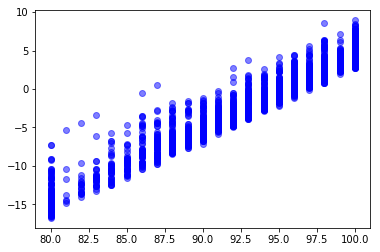

test residuals:


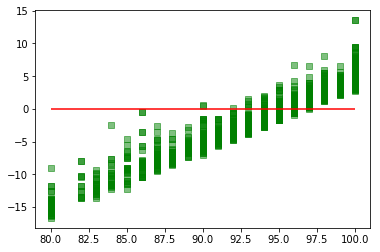

In [187]:
from vecstack import StackingTransformer
from vecstack import stacking
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

def rmse(train, pred):
    return mean_squared_error(train, pred)


lass = linear_model.Lasso(alpha=0.001, fit_intercept=False, 
                          max_iter=10000)

ridge = linear_model.Ridge(normalize=False, alpha=0.001, 
                           max_iter=10000)

gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, 
                               subsample=0.75, max_depth=20)

xgb = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.05, 
                           gamma=0, subsample=0.5, colsample_bytree=0.5, 
                           max_depth=15, objective='reg:linear')

randf = RandomForestRegressor(n_estimators=100, min_samples_split=10)

svr_rbf = SVR(kernel='rbf')


estimators = [
              ('gbf', GradientBoostingRegressor(alpha=0.1, n_estimators=200)), 
              ('xgb', xgb), 
              ('randf', randf)]

stack = StackingTransformer(estimators, regression=True, 
                            shuffle=True, n_folds=5, 
                            metric=rmse, verbose=2, 
                           )

stack = stack.fit(X_train, y_train)

# Get stacked features
S_train = stack.transform(X_train)
S_test = stack.transform(X_test)

# Use 2nd level estimator on Stacked data
model = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.05, n_jobs=-1)

model.fit(S_train, y_train)

y_train_pred = model.predict(S_train)

# Make predictions using the testing set
y_pred = model.predict(S_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

feature ranking: 
1. feature 12 (0.110168)
2. feature 6 (0.066502)
3. feature 11 (0.065271)
4. feature 8 (0.064850)
5. feature 10 (0.059247)
6. feature 1 (0.052052)
7. feature 0 (0.051591)
8. feature 25 (0.047813)
9. feature 7 (0.043966)
10. feature 2 (0.039442)
11. feature 45 (0.032439)
12. feature 27 (0.027243)
13. feature 3 (0.025387)
14. feature 20 (0.024805)
15. feature 44 (0.024051)
16. feature 48 (0.021084)
17. feature 5 (0.020721)
18. feature 29 (0.020646)
19. feature 9 (0.019978)
20. feature 37 (0.018433)
21. feature 17 (0.016708)
22. feature 33 (0.016023)
23. feature 16 (0.012619)
24. feature 13 (0.011625)
25. feature 40 (0.010417)
26. feature 22 (0.010086)
27. feature 36 (0.009936)
28. feature 21 (0.009853)
29. feature 46 (0.009375)
30. feature 32 (0.008780)
31. feature 31 (0.008428)
32. feature 30 (0.006538)
33. feature 4 (0.006381)
34. feature 18 (0.005182)
35. feature 24 (0.004976)
36. feature 41 (0.003696)
37. feature 23 (0.003229)
38. feature 34 (0.003164)
39. feature 2

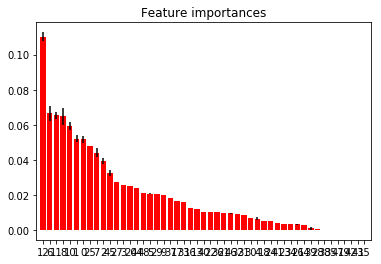

In [181]:
from sklearn.ensemble import ExtraTreesRegressor

forest = ExtraTreesRegressor(n_estimators=250, random_state=1234)

forest.fit(X_train, y_train)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], 
             axis=0)

indices = np.argsort(importances)[::-1]

print 'feature ranking: '
for f in range(X_train.shape[1]):
    print '%d. feature %d (%f)' % (f + 1, indices[f], 
                                  importances[indices[f]])


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [182]:
for i, c in enumerate(X_train.columns[indices,]):
    print '#%s: %s' % (i+1, c)

#1: host_response_time_within_an_hour
#2: cancellation_policy_flexible
#3: host_response_time_within_a_few_hours
#4: cancellation_policy_strict
#5: host_response_time_within_a_day
#6: room_type_private_room
#7: room_type_entire_home_apt
#8: neighbourhood_cleansed_downtown_civic_center_by_property_type_apartment
#9: cancellation_policy_moderate
#10: property_type_apartment
#11: neighbourhood_cleansed_mission_by_property_type_apartment
#12: neighbourhood_cleansed_downtown_civic_center_by_property_type_dorm
#13: property_type_condominium
#14: neighbourhood_cleansed_excelsior_by_property_type_house
#15: neighbourhood_cleansed_parkside_by_property_type_house
#16: neighbourhood_cleansed_mission_by_property_type_house
#17: property_type_house
#18: neighbourhood_cleansed_south_of_market_by_property_type_apartment
#19: host_response_time_a_few_days_or_more
#20: neighbourhood_cleansed_bayview_by_property_type_apartment
#21: neighbourhood_cleansed_excelsior_by_property_type_apartment
#22: neighbo